In [1]:
%matplotlib inline

# Bears 
+ Download the bears dataset and its description from Moodle
+ Load the dataset as a pandas DataFrame


In [2]:
import pandas as pd
df = pd.read_csv("bears.csv",sep=";")
print(df.shape)
df.head()

(54, 9)


,AGE,MONTH,SEX,HEADLEN,HEADWTH,NECK,LENGTH,CHEST,WEIGHT
0,19,7,1,11.0,5.5,16.0,53.0,26.0,80
1,55,7,1,16.5,9.0,28.0,67.5,45.0,344
2,81,9,1,15.5,8.0,31.0,72.0,54.0,416
3,115,7,1,17.0,10.0,31.5,72.0,49.0,348
4,104,8,2,15.5,6.5,22.0,62.0,35.0,166


## Classification
The goal of this section is to train Machine Learning classifiers to predict the bears' sex from the other attributes
+ Extract the sex column from the dataset, in order to use it as a class membership vector.
+ Print the statistical descriptors for each column of the dataset
+ What can you say about the features' scales?


In [3]:
y = df["SEX"]
X = df.copy()
del X["SEX"]
X.describe()

,AGE,MONTH,HEADLEN,HEADWTH,NECK,LENGTH,CHEST,WEIGHT
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,43.518519,8.407407,12.953704,6.194444,20.555556,58.616667,35.662963,182.888889
std,33.720684,2.004886,2.144032,1.512266,5.640710,10.700868,9.351729,121.801209
min,8.000000,4.000000,9.000000,4.000000,10.000000,36.000000,19.000000,26.000000
25%,17.000000,8.000000,11.500000,5.000000,16.625000,50.500000,29.000000,87.000000
50%,34.000000,9.000000,13.000000,6.000000,20.000000,60.750000,34.000000,150.000000
75%,57.750000,10.000000,14.500000,7.000000,24.000000,66.125000,43.500000,232.000000
max,177.000000,11.000000,17.000000,10.000000,31.500000,76.500000,55.000000,514.000000


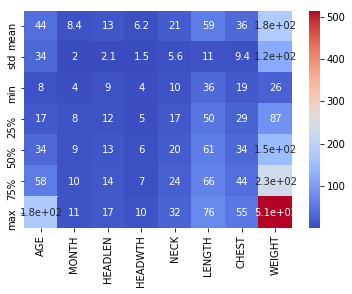

In [4]:
import seaborn as sns
stats = X.describe()
stats = stats.drop('count',axis=0)
sns.heatmap(stats,annot=True,cmap='coolwarm')

+ Apply a Z-score standardization to the dataset, and create another one.
+ Compute the same previous statistics

In [5]:
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler().fit(X)
X_z = pd.DataFrame(zscore.transform(X), index=X.index, columns=X.columns)
X_z.describe()

,AGE,MONTH,HEADLEN,HEADWTH,NECK,LENGTH,CHEST,WEIGHT
count,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01
mean,-1.233581e-17,3.577385e-16,-2.117648e-16,-1.027984e-16,-2.446603e-16,3.340949e-17,-2.158767e-17,8.223874e-18
std,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00
min,-1.063206e+00,-2.218976e+00,-1.861366e+00,-1.464722e+00,-1.888888e+00,-2.133381e+00,-1.798537e+00,-1.300168e+00
25%,-7.938013e-01,-2.051154e-01,-6.843899e-01,-7.972538e-01,-7.033623e-01,-7.656277e-01,-7.191748e-01,-7.946495e-01
50%,-2.849259e-01,2.983497e-01,2.179586e-02,-1.297855e-01,-9.941517e-02,2.012327e-01,-1.794939e-01,-2.725565e-01
75%,4.260030e-01,8.018147e-01,7.279816e-01,5.376828e-01,6.163741e-01,7.082449e-01,8.458998e-01,4.069932e-01
max,3.995615e+00,1.305280e+00,1.904958e+00,2.540088e+00,1.958479e+00,1.686896e+00,2.087166e+00,2.743981e+00


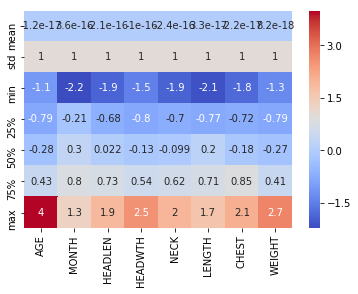

In [6]:
import seaborn as sns
stats = X_z.describe()
stats = stats.drop('count',axis=0)
sns.heatmap(stats,annot=True,cmap='coolwarm')

+ Train a $K$-NN model with default parameters, using the raw dataset and another using the normalized dataset
+ Compare their results using an appropriate procedure and suitable measures+ Compare their performances 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_validate 

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

scoring = ['accuracy',
           'precision_weighted',
           'recall_weighted',
           'f1_weighted']

knn = KNeighborsClassifier()
scores = cross_validate(knn, X, y, scoring=scoring,cv=cv, return_train_score=True)
scores = pd.DataFrame(scores).mean()

knn = KNeighborsClassifier()
scores_z = cross_validate(knn, X_z, y, scoring=scoring,cv=cv, return_train_score=True)
scores_z = pd.DataFrame(scores_z).mean()

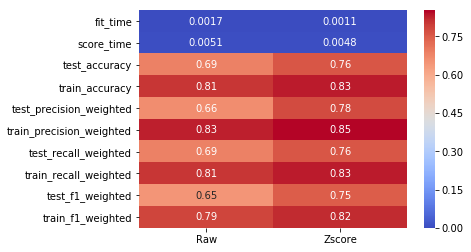

In [8]:
full_scores = pd.DataFrame({"Raw": scores, "Zscore":scores_z})
sns.heatmap(full_scores,annot=True,cmap='coolwarm')

+ Train and test different $K$-NN models to classify the bears in two categories ("males" and "females")
    + Using different number of neighbors.
    + And using different [weighting techniques](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
    + Using different [distance metrics](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html).
+ Evaluate and compare the results using an appropriate procedure and suitable measures

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_validate 

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

n_neighbors = [1,3,5]
weights = ["uniform", "distance"]
distances = ["euclidean","manhattan"]

scoring = ['accuracy',
           'precision_weighted',
           'recall_weighted',
           'f1_weighted']

full_scores = {}
for k in n_neighbors:
    for d in distances:
        for w in weights:
            knn = KNeighborsClassifier(n_neighbors=k, weights=w, metric=d)
            scores = cross_validate(knn, X_z, y, scoring=scoring,cv=cv, return_train_score=True)
            scores = pd.DataFrame(scores).mean()
            full_scores[str(k)+"-"+d+"-"+w] = scores

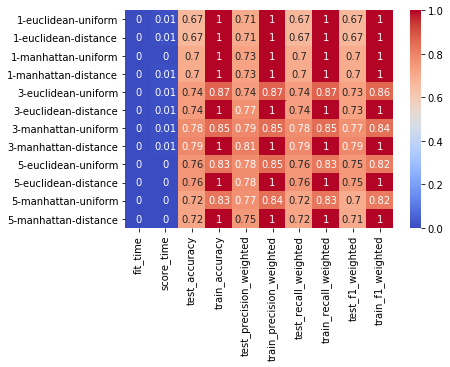

In [10]:
full_scores = pd.DataFrame(full_scores)
sns.heatmap(full_scores.T.round(2),annot=True,cmap='coolwarm')

__Bonus__
+ Train three learners to classify the bears in two categories ("males" and "females") using:
    + Decision Tree Classifier
    + A Linear SVM Classifier
    + A K-NN Classifier
+ Compare their results using an appropriate procedure and suitable measures

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_validate 

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

knn = KNeighborsClassifier()
scores_knn = cross_validate(knn, X_z, y, scoring=scoring,cv=cv, return_train_score=True)
scores_knn = pd.DataFrame(scores_knn).mean()

dt = DecisionTreeClassifier()
scores_dt = cross_validate(dt, X_z, y, scoring=scoring,cv=cv, return_train_score=True)
scores_dt = pd.DataFrame(scores_dt).mean()

svm = SVC(kernel='linear')
scores_svm = cross_validate(svm, X_z, y, scoring=scoring,cv=cv, return_train_score=True)
scores_svm = pd.DataFrame(scores_svm).mean()

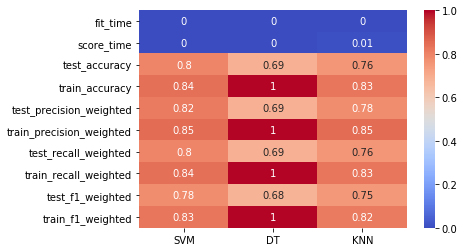

In [12]:
full_scores = pd.DataFrame({"SVM": scores_svm, "DT":scores_dt, "KNN":scores_knn})
sns.heatmap(full_scores.T.round(2).T,annot=True,cmap='coolwarm')

## Unsupervised Learning
+ Use DBSCAN to identify possible outliers?

In [13]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2)
outliers = dbscan.fit_predict(X_z)
outliers = outliers == -1
X[outliers]

,AGE,MONTH,HEADLEN,HEADWTH,NECK,LENGTH,CHEST,WEIGHT
5,100,4,13.0,7.0,21.0,70.0,41.0,220
7,51,4,13.5,8.0,27.0,68.5,49.0,360
19,177,9,16.0,9.5,30.0,72.0,48.0,436


In [14]:
X.describe()

,AGE,MONTH,HEADLEN,HEADWTH,NECK,LENGTH,CHEST,WEIGHT
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,43.518519,8.407407,12.953704,6.194444,20.555556,58.616667,35.662963,182.888889
std,33.720684,2.004886,2.144032,1.512266,5.640710,10.700868,9.351729,121.801209
min,8.000000,4.000000,9.000000,4.000000,10.000000,36.000000,19.000000,26.000000
25%,17.000000,8.000000,11.500000,5.000000,16.625000,50.500000,29.000000,87.000000
50%,34.000000,9.000000,13.000000,6.000000,20.000000,60.750000,34.000000,150.000000
75%,57.750000,10.000000,14.500000,7.000000,24.000000,66.125000,43.500000,232.000000
max,177.000000,11.000000,17.000000,10.000000,31.500000,76.500000,55.000000,514.000000


+ Use Seaborn's Clustermap visualization to represent the dataset

+ Add [colored labels](https://seaborn.pydata.org/generated/seaborn.clustermap.html) representing the bear's sex

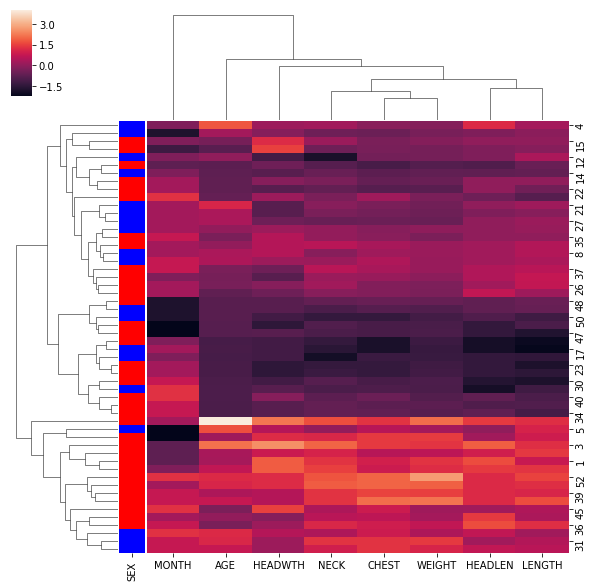

In [15]:
lut = dict(zip(y.unique(), "rb"))
row_colors = y.map(lut)
g = sns.clustermap(X_z, row_colors=row_colors)

+ Include other possibly useful visualizations
+ You can compute a correlation matrix, and exclude correlated feature from the analysis

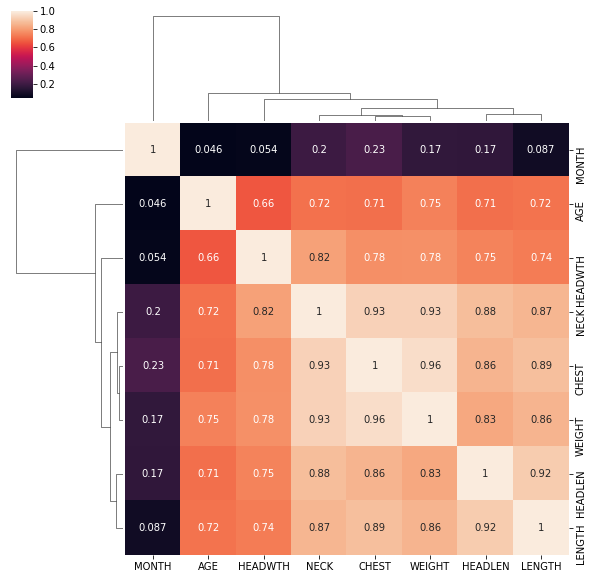

In [16]:
sns.clustermap(X_z.corr(),annot=True)

+ Given the Clustermap visualization, could you choose a smaller subset of features to conduct the analysis?
+ You can also create new features (e.g., Body mass index $BMI = \frac{Weight}{Size^2}$)

In [17]:
X_z_sub = X_z[["AGE","HEADWTH","WEIGHT","LENGTH"]]

+ Cluster the dataset using the $K$-means algorithm
+ Choose an appropriate number of clusters

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse = {}
silhouette = {}
for k in range(2,20):
    km = KMeans(k).fit(X_z_sub)
    sse[k] = km.inertia_
    clusters = km.predict(X_z_sub)
    silhouette[k] = silhouette_score(X_z_sub,clusters)
sse = pd.Series(sse)
silhouette = pd.Series(silhouette)

Text(0.5, 0, 'k')

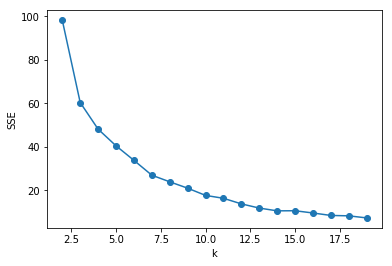

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(2,20),sse,"o-")
plt.ylabel("SSE")
plt.xlabel('k')

Text(0.5, 0, 'k')

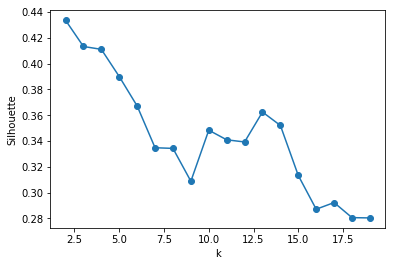

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(2,20),silhouette,"o-")
plt.ylabel("Silhouette")
plt.xlabel('k')

+ Build a white-box model to explain $a$ $posteriori$ the clustering model
+ Analyze the clustering model

In [22]:
k = 3
clusters = KMeans(k).fit_predict(X_z_sub)
dt = DecisionTreeClassifier().fit(X_z_sub,clusters)

[Text(133.92000000000002, 195.696, 'WEIGHT <= -0.563\ngini = 0.65\nsamples = 54\nvalue = [13, 23, 18]'),
 Text(66.96000000000001, 152.208, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 18]'),
 Text(200.88000000000002, 152.208, 'WEIGHT <= 0.913\ngini = 0.461\nsamples = 36\nvalue = [13, 23, 0]'),
 Text(133.92000000000002, 108.72, 'LENGTH <= 0.932\ngini = 0.147\nsamples = 25\nvalue = [2, 23, 0]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 22\nvalue = [0, 22, 0]'),
 Text(200.88000000000002, 65.232, 'HEADWTH <= 0.371\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 11\nvalue = [11, 0, 0]')]

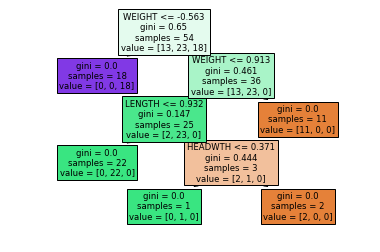

In [26]:
from sklearn.tree import plot_tree
plot_tree(dt,filled=True, feature_names=X_z_sub.columns)

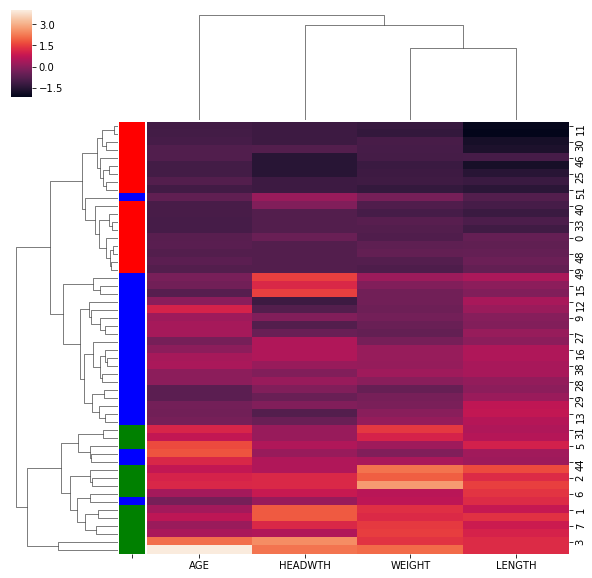

In [30]:
clusters = pd.Series(clusters)
lut = dict(zip(clusters.unique(), "rgb"))
row_colors = clusters.map(lut)
g = sns.clustermap(X_z_sub, row_colors=row_colors)
